# Diesease Monitoring and Prevention

The healthcare industry is in need of assistance in predicting disease outbreaks through Data Sciences. Predictive modeling helps in understanding the flow and pattern of the spread and then making prediction for future confirmed cases from its findings.

This report provides insight on a research carried out to monitor and understand the spread of the Covid-19 virus globally. It includes analysis that explains acurately the pattern and spread of the within each Country and Continent gloablly. It also includes predictive modelling that makes use of the healthcare historical data provided to forecast the future spread of the virus within a particular region.

The Dataset used for this research work is a combination of multiple datasets to get the required information. All necessary validation and cleaning have been implemented.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
confirmed = pd.read_csv('confirmed.csv')
confirmed

,Province/State,Country/Region,Continent,Lat,Long,Date,Confirmed,Deaths,Day,Month,Year
0,Unknown,Afghanistan,Asia,33.939110,67.709953,2020-01-22,0,0,22,1,2020
1,Unknown,Albania,Europe,41.153300,20.168300,2020-01-22,0,0,22,1,2020
2,Unknown,Algeria,Africa,28.033900,1.659600,2020-01-22,0,0,22,1,2020
3,Unknown,Andorra,Europe,42.506300,1.521800,2020-01-22,0,0,22,1,2020
4,Unknown,Angola,Africa,-11.202700,17.873900,2020-01-22,0,0,22,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
329179,Unknown,West Bank and Gaza,Asia,31.952200,35.233200,2023-03-09,703228,5708,9,3,2023
329180,Unknown,Winter Olympics 2022,Asia,39.904200,116.407400,2023-03-09,535,0,9,3,2023
329181,Unknown,Yemen,Asia,15.552727,48.516388,2023-03-09,11945,2159,9,3,2023
329182,Unknown,Zambia,Africa,-13.133897,27.849332,2023-03-09,343135,4057,9,3,2023


In [4]:
confirmed['Country/Region'].nunique()

200

We first need to understand the pattern/trend of the spread of the disease globally from 22/01/2020 to 09/02023.

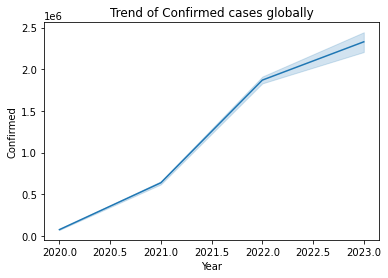 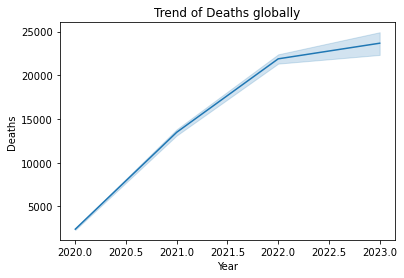 

Next, we need to identify the continents with the highest number of confirmed cases from 22/01/2020 to 09/02023.

In [5]:
group = confirmed.groupby(['Continent', 'Country/Region'])[['Confirmed', 'Deaths']].mean().reset_index()
group = group.sort_values(by=['Continent', 'Confirmed', 'Deaths'], ascending=[True, False, False])
cont = group.groupby('Continent')[['Confirmed', 'Deaths']].mean().sort_values(by=['Confirmed', 'Deaths'], ascending=[False, False])
cont

,Confirmed,Deaths
Continent,,
South America,2.585778e+06,64197.523925
North America,2.066093e+06,33881.676229
Asia,1.615714e+06,16557.109470
Europe,1.563999e+06,20065.238229
Africa,1.224593e+05,2763.474700
Oceania,4.566137e+04,114.039037
Antarctica,4.340332e+00,0.000000


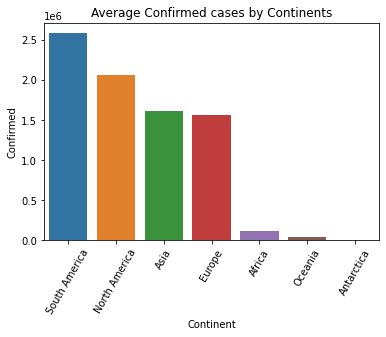 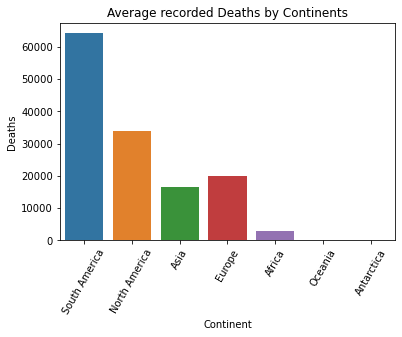

The table below gives a breakdown of the average confirmed cases by continents from 22/01/2020 to 09/02023. 
- South America has the hisgest number of confirmed cases and also the the highest number of recorded deaths
- North America follows closely in both confirmed cases and deaths
- Asia comes third for highest average number of confirmed cases but with a lower records of death compared to Europe which comes fourth

The charts below identifies the top 5 countries within continent with highest confirmed cases 

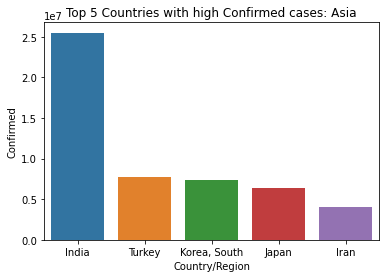 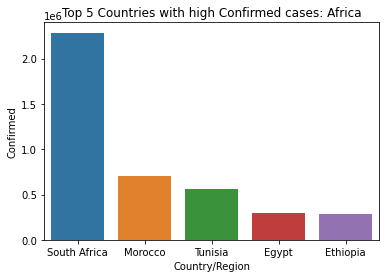 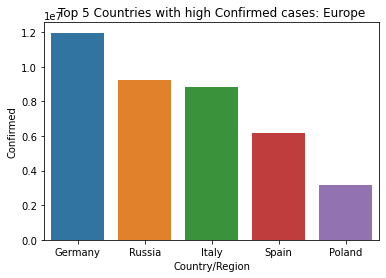 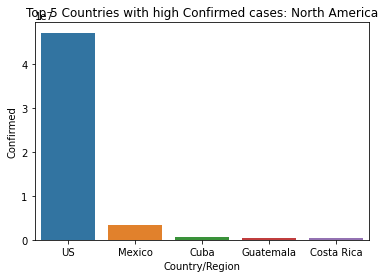 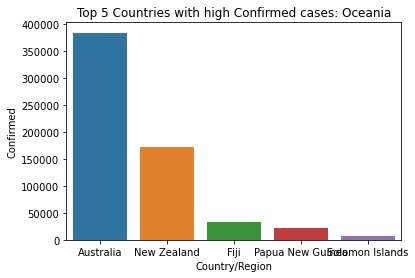 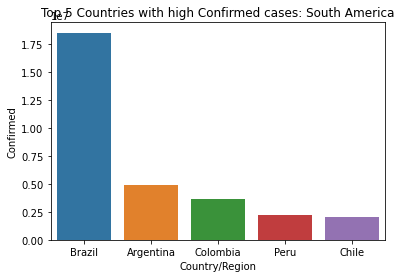

We need to understand the relationship between Confirmed Cases and Deaths by continents

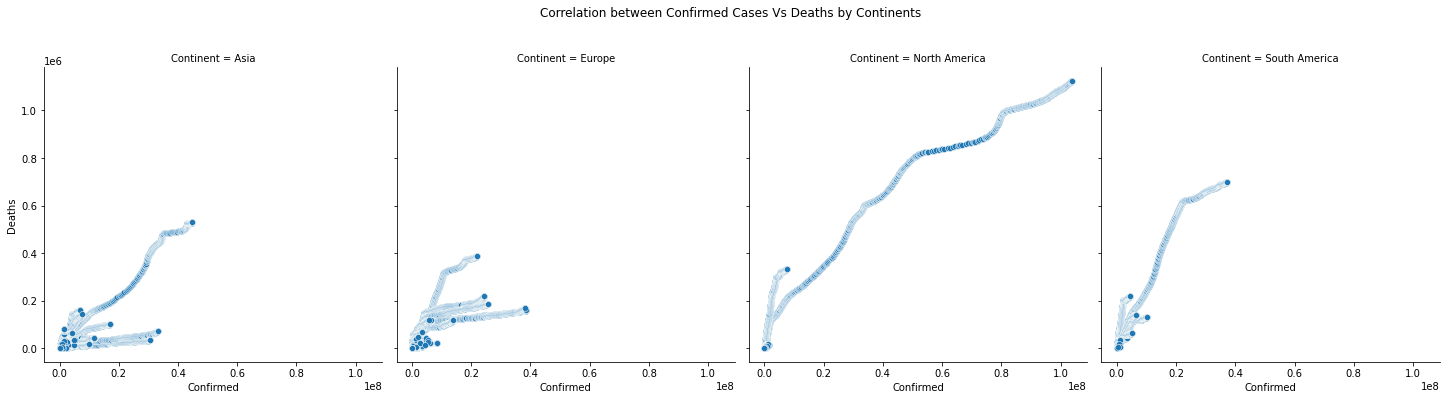 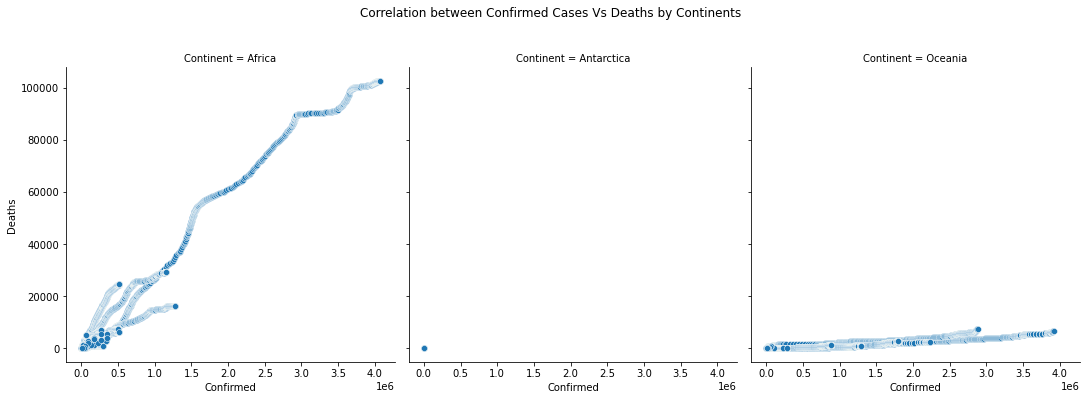

# Model Implentation

Considering we have data for 200 Countries Dated from 22/01/2020 to 09/02023, we would be subsetting our data by countries to build models that are able to learn the pattern of the spread effective and make accurate predictions afterwards

We are subsetting the data to focus on the US as case study since they have the highest number of confirmed cases. 

The first model we would be using is the ARIMA model to forecast future spread. This simply collects the column holding the data to be predicted (Confirmed column in this case) as a single imput into the model, learns the pattern, then use it knowledge to make forecast future spread.

We would be using two seperate approch in this model to see one performs better. 
- The first would be the manual approach where we perform some analysis manually and select the parameters for the model from our findings in the analysis performed.
- The second would be the Automatic approach where we instruct the model to run its own analysis and select the parameters it feels would yield best result.

In preparing for modeling, the data was splitted into two parts:
- Train part: this part is fitted into the model. This is what the model uses to learn the pattern and spread of the disease over time.
- Test part: this part is then used to test the accuracy of the model's prediction. It is done by asking the model to make a prediction then cross referencing that prediction with the test data.

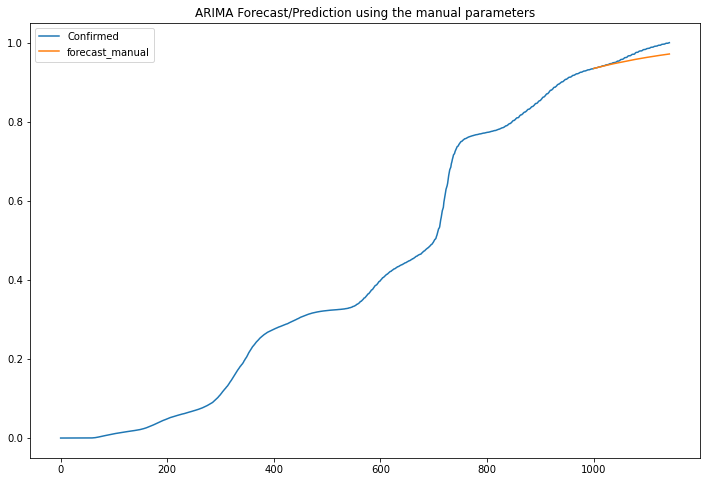 

We observe from the Manual approach that the model forecast the future spread accurately for a while but then begins to underperform later on when compared to the actual test data.

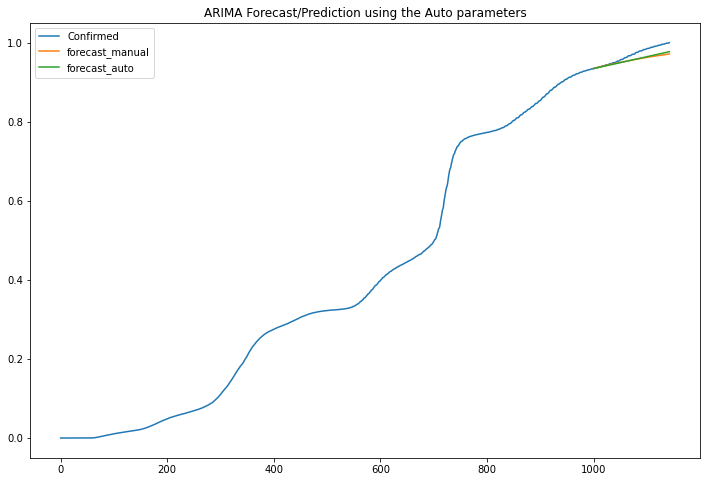

We observe from the Automatic approach that the model performs slightly better than the manual appraoch. However like the manual appraoch, it still forecasts the future spread accurately for a while but then begins to underperform later on when compared to the actual test data.

Evaluating the performance of the model statistically we have 
- mean absolute error (manual approach): 0.013106458561437263
- mean absolute percentage error (manual approach): 0.013322382629732244
- root mean absolute error (manual approach): 0.016564120933946595

- mean absolute error (auto approach): 0.012261591768605216
- mean absolute percentage error (auto approach): 0.012488511523611228
- root mean absolute error (auto approach): 0.014832534137594599

- The MAE score here identifies the average absolute difference between the test values and the predicted values i.e just how far the predicted values deviate from the actual value. Generally, the lower the MAE the better the model's performance.
- The MAPE score tells you, on average, how far off your predictions are from the actual values in percentage terms.
- The RMSE here also measures the accuracy of the forecast here by comparing it with the test dataset. However, it is used simply to penalize larger errors more heavily than smaller errors because it involves squaring the differences.

The MAE, MAPE, and RMSE statistical methods shows that the auto-arima model performs best since they all have lower values.

# Using a linear regression model

There is however the possiblity of having another model that forecast future spread better than ARIMA. We would be using the Linear Regression model to compare the accuracy in forecasting

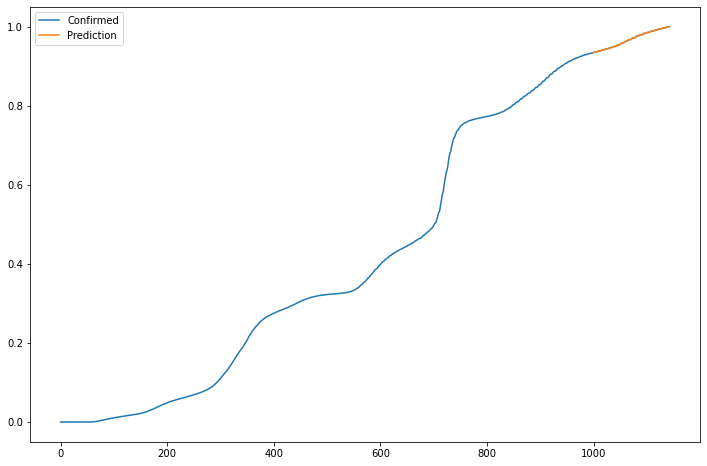

The plot here shows just how accurately Linear regression does at forecasting future spread. The prediction line rest direction on top of the actaul test line. This confirms that Linear regression does far better at forecasting than the ARIMA model.

- mae linear regression: 0.00036872279435814186
- mape linear regression: 0.00038055197193779514
- rmse linear regression: 0.0004484561521118223

The MAE, MAPE, and RMSE for linear regression model are extremely low showing how good the model performs

For good measure the model is also implemented in forecasting Deaths rate.

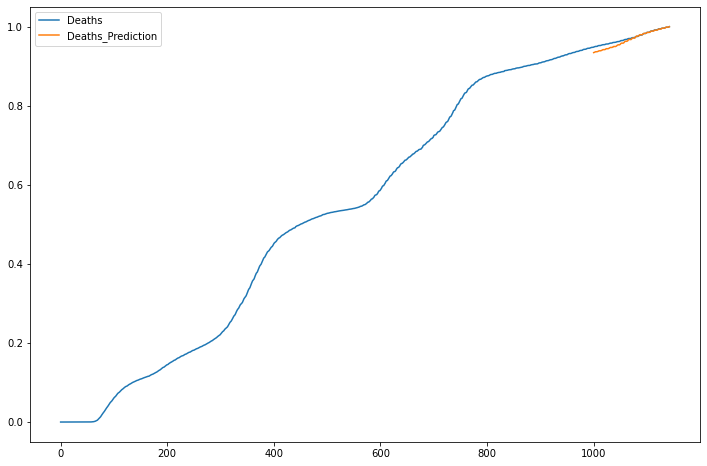